<img src="https://comet.ml/images/logo_comet_light.png" width="200px"/>

# Comet.ml Python API

*This page is available as an executable or viewable **Jupyter Notebook**:* <br/>
<a href="https://mybinder.org/v2/gh/comet-ml/comet-examples/master?filepath=notebooks%2FComet-Python-API.ipynb" target="_parent"><img align="left" src="https://mybinder.org/badge_logo.svg"></a>
<a href="https://nbviewer.jupyter.org/github/comet-ml/comet-examples/blob/master/notebooks/Comet-Python-API.ipynb" target="_parent"><img align="right" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" width="109" height="20"></a>
<br/>
<hr/>
Comet.ml has an extensive interface to all of your data using a [REST API](https://en.wikipedia.org/wiki/Representational_state_transfer) through [Comet.ml endpoints](https://www.comet.ml/docs/rest-api/endpoints/). Now, you can access this information easily through the Comet.ml Python SDK. Requires version comet_ml version 2.0.9 or greater.

## Setup

To run the following experiments, you'll need to set your COMET_API_KEY and COMET_REST_API_KEY. The easiest way to to this is to set the values in a cell like this:

```python
import comet_ml

comet_ml.save(api_key="...", rest_api_key="...")
```
where you replace the ...'s with your keys.

You can get your COMET_API_KEY under your quickstart link (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/quickstart

You can get your COMET_REST_API_KEY under your settings (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/settings/account

## Quick Overview

To access the Python API through the Comet.ml SDK, you will need to make an API() instance. First, we import the API class and other libraries we will need. Note that this is a new interface and comes from `comet_ml.papi`:

In [1]:
from comet_ml.papi import API
import comet_ml

import matplotlib.pyplot as plt
%matplotlib inline

and create the API instance:

In [2]:
comet_api = API()

Using the `comet_api` instance, you can get the name of your workspaces:

In [3]:
comet_api.get()

['collaboration', 'conx', 'team-comet-ml', 'ceceshao1', 'dsblank']

If you reference your workspace by name using comet_api.get(WORKSPACE_NAME), you'll see your projects:

In [4]:
print(comet_api.get("dsblank"))

['optimizer-11', 'pytorch', 'comet-examples', 'mnist-001', 'xor', 'java-sdk', 'test-007', 'visualizations', 'xor3', 'opt-prod-iii', 'mnist-002', 'dscout', 'strata', 'optimizer-12', 'xor2', 'test-epochs', 'test-experiment', 'odcs-east-2019', 'histograms', 'optimizer-1-0-0', 'multi-process', 'conx', 'prj-name', 'predictor-00', 'optimizer-3', 'optimizer-5', 'optimizer-2-1', 'optimizer-12', 'ludwig', 'pypy', 'tensorflow', 'optimizer-2', 'odsc-east', 'comet-notebooks', 'optimizer-1', 'optimizer-4', 'odsc-east-2019', 'temp', 'pycon2019', 'keras-optimizer-example', 'chainer', 'mnist-014', 'notebook-test', 'optimizer', 'multi-process', 'interactive-figures', 'general', 'predictive-learning-curve', 'jupyter-experiments', 'google-ml', 'matplotlib', 'keras', 'fastai', 'test']


Or, get the projects from another user or shared workspace:

In [5]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

Using the same method, you can refer to a project by name:

In [6]:
comet_api.get("dsblank", "keras")

[<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>,
 <APIExperiment 'dsblank/keras/351afa6e498f452ca743c19d3e131767'>,
 <APIExperiment 'dsblank/keras/72b89ab961cd42db91535026687f86fb'>,
 <APIExperiment 'dsblank/keras/d5d3cf989efd4b5f8841bd64fee5f817'>,
 <APIExperiment 'dsblank/keras/12ab8382de254a9bb678bf3d6131e255'>,
 <APIExperiment 'dsblank/keras/51cf6e588a3346cdb560fd0c09d49610'>]

Or, using the slash delimiter:

In [7]:
comet_api.get("dsblank/keras")

[<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>,
 <APIExperiment 'dsblank/keras/351afa6e498f452ca743c19d3e131767'>,
 <APIExperiment 'dsblank/keras/72b89ab961cd42db91535026687f86fb'>,
 <APIExperiment 'dsblank/keras/d5d3cf989efd4b5f8841bd64fee5f817'>,
 <APIExperiment 'dsblank/keras/12ab8382de254a9bb678bf3d6131e255'>,
 <APIExperiment 'dsblank/keras/51cf6e588a3346cdb560fd0c09d49610'>]

And one more level, get an `APIExperiment` object:

In [8]:
comet_api.get("dsblank", "keras", '5dc346a883964bd2b8864c40940fd864')

<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>

Or, again using the slash shorthand:

In [9]:
comet_api.get("dsblank/keras/5dc346a883964bd2b8864c40940fd864")

<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>

Let's get an experiment and save it to a variable named `exp`:

In [10]:
exp = comet_api.get("dsblank/keras/51cf6e588a3346cdb560fd0c09d49610")

In [11]:
exp

<APIExperiment 'dsblank/keras/51cf6e588a3346cdb560fd0c09d49610'>

There are a number of items you get from the APIExperiment instance:

In [12]:
help(exp)

Help on APIExperiment in module comet_ml.papi object:

class APIExperiment(builtins.object)
 |  The APIExperiment class is used to access data from the
 |  Comet.ml Python API.
 |  
 |  You can use an instance of the APIExperiment() class to easily
 |  access all of your logged experiment information
 |  at [Comet.ml](https://www.comet.ml), including metrics, parameters,
 |  images, tags, and assets.
 |  
 |  ```python
 |  >>> from comet_ml.papi import API
 |  >>>> comet_api = API()
 |  
 |  ## Get an APIExperiment:
 |  >>>  experiment = comet_api.get("cometpublic/comet-notebooks/example 001")
 |  
 |  ## Get metrics:
 |  >>> experiment.get_metrics("train_accuracy")
 |  ```
 |  
 |  For more usage examples, see [Comet Python API examples](../python-api/).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key, project_id)
 |      Python API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_tags(self, tags)
 |  

For example, we can explore the `other` property, which shows items saved with Experiment.log_other(NAME, VALUE):

In [13]:
exp.get_others_summary()

[{'name': 'Name',
  'valueMax': 'example 001',
  'valueMin': 'example 001',
  'valueCurrent': 'example 001',
  'timestampMax': 1544452402114,
  'timestampMin': 1544452402114,
  'timestampCurrent': 1544452402114},
 {'name': 'trainable_params',
  'valueMax': '134794',
  'valueMin': '134794',
  'valueCurrent': '134794',
  'timestampMax': 1542738532810,
  'timestampMin': 1542738532810,
  'timestampCurrent': 1542738532810}]

In this example, we see that the experiment has the `Name` "example 001". We can use `Name` to also look up experiments:

In [14]:
exp = comet_api.get("dsblank/keras/example 001")
exp.id, exp.name

('51cf6e588a3346cdb560fd0c09d49610', 'example 001')

Perhaps one of the most useful abilities for the Python API is to access your experiment's data in order to create a variation of a plot. To access the raw metric data, use the `.get_metrics()` method of the APIExperiment:

In [73]:
len(exp.get_metrics())

1127

We see here were over 2000 metrics logged during the training of this experiment. We can get the first using indexing with an integer:

In [16]:
exp.get_metrics()[0]

{'metricName': 'acc',
 'metricValue': '0.09166666865348816',
 'timestamp': 1542738532966,
 'step': 1,
 'epoch': None,
 'runContext': None,
 'offset': 21}

That shows that the "acc" (accuracy) metric had a value of about 0.09 at step 1 of the experiment.

We can also use a string as an index to query all of the dictionaries in `metrics_raw` to only give those values at each step, like so:

In [17]:
acc_metrics = exp.get_metrics("acc")

In [18]:
len(acc_metrics)

510

In [19]:
acc_metrics[0]

(1, 0.09166666865348816)

Therefore, `exp.get_metrics("acc")` gives us (step, value) for all "acc" items. We can then easily use Python's built in zip and matplotlib to plot these values:

In [20]:
steps, acc = zip(*acc_metrics)

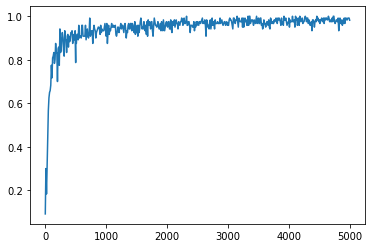

In [21]:
plt.plot(steps, acc);

That's it for a quick overview. Now let's look in detail at each component.

## Workspaces

`comet_api.get()` reports your workspace names:

In [43]:
comet_api.get()

['collaboration', 'conx', 'team-comet-ml', 'ceceshao1', 'dsblank']

You can also interate over those names:

In [44]:
for workspace in comet_api.get():
    print(workspace)

collaboration
conx
team-comet-ml
ceceshao1
dsblank


As we saw above, you can also access other public workspaces as well:

In [45]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

## Projects

Under get(WORKSPACE_NAME), you'll find the projects:

In [46]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

In [47]:
project = comet_api.get("cometpublic", "comet-notebooks")
## OR:
#project = comet_api.get("cometpublic/comet-notebooks")

If you just print out, or iterate over a project, you get access to the experiments:

In [48]:
project

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>]

In [51]:
project[0].id, project[0].get_name()

('7092a5e4c362453fb0b3f06785a1d30c', '')

In [52]:
project[1].id, project[1].get_name()

('d21f94a1c71841d2961da1e6ddb5ab20', 'example 001')

## Experiments

Continuing with the dictionary-like access, you can see and iterate over the experiment ids:

In [53]:
comet_api.get("cometpublic", "comet-notebooks")

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>]

In [54]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'd21f94a1c71841d2961da1e6ddb5ab20')
## OR
# exp = comet_api.get("cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20")
exp

<APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>

In [55]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'example 001')
## OR
## exp = comet_api.get("cometpublic/comet-notebooks/example 001")
exp

<APIExperiment 'cometpublic/comet-notebooks/example 001'>

### Regular Expression Experiment Name Matching

You can also use regular expressions as the name for the experiment:

In [56]:
comet_api.get_experiments("cometpublic", "comet-notebooks", "example.*")

[<APIExperiment 'cometpublic/comet-notebooks/example 001'>]

### Experiment Properties

In this brief dictionary representation, you will see that `get_others_summary()`, `get_metrics_summary()` and `get_parameters_summary()` give summary data for each item:

In [57]:
exp.get_parameters_summary()

[{'name': 'f',
  'valueMax': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueMin': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueCurrent': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'timestampMax': 1542823692798,
  'timestampMin': 1542823692798,
  'timestampCurrent': 1542823692798}]

In [58]:
exp.get_others_summary()[0]["name"], exp.get_others_summary()[0]["valueCurrent"]

('Name', 'example 001')

In [59]:
exp.get_metrics_summary("train_loss")

[{'name': 'train_loss',
  'valueMax': '2.3872790336608887',
  'valueMin': '2.3872790336608887',
  'valueCurrent': '2.3872790336608887',
  'timestampMax': 1542823695820,
  'timestampMin': 1542823695820,
  'timestampCurrent': 1542823695820,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train',
  'stepMax': 0,
  'stepMin': 0,
  'stepCurrent': 0}]

You can see all of the methods and propeties on an experiment instance:

In [37]:
help(exp)

Help on APIExperiment in module comet_ml.papi object:

class APIExperiment(builtins.object)
 |  The APIExperiment class is used to access data from the
 |  Comet.ml Python API.
 |  
 |  You can use an instance of the APIExperiment() class to easily
 |  access all of your logged experiment information
 |  at [Comet.ml](https://www.comet.ml), including metrics, parameters,
 |  images, tags, and assets.
 |  
 |  ```python
 |  >>> from comet_ml.papi import API
 |  >>>> comet_api = API()
 |  
 |  ## Get an APIExperiment:
 |  >>>  experiment = comet_api.get("cometpublic/comet-notebooks/example 001")
 |  
 |  ## Get metrics:
 |  >>> experiment.get_metrics("train_accuracy")
 |  ```
 |  
 |  For more usage examples, see [Comet Python API examples](../python-api/).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key, project_id)
 |      Python API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_tags(self, tags)
 |  

For example, just like when creating and logging data, you can also use the `.display()` method to show the Comet.ml page for that experiment right in the notebook:

In [38]:
exp.display()

You can get an existing experiment:

In [39]:
e = comet_api.get("dsblank", "chainer", "596d91ae1dbc420c9b13a3ced858de3c")
API_KEY = comet_ml.get_config()["comet.api_key"]
ee = comet_ml.ExistingExperiment(API_KEY, previous_experiment=e.id)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c



You can make changes to the saved data using the existing experiment:

https://www.comet.ml/docs/python-sdk/ExistingExperiment/

In [40]:
ee.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c
COMET INFO: ----------------------------
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)


### Examples

Comet.ml is working on a query API which will allow highly efficient queries of your data. However, you can also write your own query of sorts.

Here is some code that prints out the names of experiments that have associated HTML (this can take a long time if you have many experiments):

In [41]:
%%time
workspace = "dsblank"
for project in comet_api.get(workspace):
    print("    processing project", project, "...")
    print("        processing experiment", exp.id, end="")
    for exp in comet_api.get(workspace, project):
        print(".", end="")
        if exp.get_html() != None:
            print("\nFound html in %s!" % exp.id)
            break
    print()

    processing project optimizer-11 ...
        processing experiment d21f94a1c71841d2961da1e6ddb5ab20.....
    processing project pytorch ...
        processing experiment 26bce3d761984f3ab4cfea27950d58e1.........................................
    processing project comet-examples ...
        processing experiment 170b56d249f8487cbb1541d2b4ab79c3....
    processing project mnist-001 ...
        processing experiment c3b3a96f11894c26899e53e95a8f6759................................................................................
    processing project xor ...
        processing experiment ae1e88fa61554715afdb7805d676c9fc
    processing project java-sdk ...
        processing experiment ae1e88fa61554715afdb7805d676c9fc..............................................................................
    processing project test-007 ...
        processing experiment restcf42644ae90a43f4a60f9cff1b2bf6c8..........
    processing project visualizations ...
        processing experiment 0e0197b2

Here is a function that will find the first experiment that has associated images:

In [23]:
def find_image():
    for workspace in comet_api.get():
        for project in comet_api.get(workspace):
            for exp in comet_api.get(workspace, project):
                if exp.get_images() != []:
                    return exp

In [24]:
find_image()

<APIExperiment 'team-comet-ml/lc-predictor-parallel/a358b75289c849578ab06b17d3baa8f9'>

Now, we get the experiment API and explore the `APIExperiment.get_images()` method:

In [25]:
comet_api.get('dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0').get_images()

[{'experimentKey': '3b56611892b7447aa8c4486a6eeb27d0',
  'figCounter': 0,
  'figName': 'Exponential Slowdown',
  'step': None,
  'runContext': None,
  'fileName': '4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'fileSize': 0,
  'imagePath': 'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'createdAt': 1542116223922,
  'imageId': 'X94DIfASupKj74rIK6PMVDimk'}]

We can get a URL for the image, and display it in the notebook:

In [60]:
url = comet_api.get('dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0').get_images()[0]["imagePath"]
url

'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg'

In [61]:
from IPython.display import Image

In [62]:
Image(url=url)

Now, let's write a short program that will find the run with the best accuracy given a workspace/project string:

In [29]:
def find_best_run(workspace, project):
    runs = []
    for exp in comet_api.get(workspace, project):
        accs = [x for x in exp.get_metrics_summary() if x["name"] == "acc"]
        if len(accs) > 0:
            runs.append([float(accs[0]["valueMax"]), exp])
    if runs:
        return sorted(runs, key=lambda v: v[0], reverse=True)[0]

In [30]:
find_best_run("cometpublic", "fasttext")

[1.0, <APIExperiment 'cometpublic/fasttext/44ea2d68794d4c5e9e18b86c30562bf8'>]

Can we get all of the `hidden_size` parameter values for the experiments in dsblank/pytorch?

In [32]:
[[p["valueCurrent"] for p in exp.get_parameters_summary()] for exp in comet_api.get("dsblank/pytorch")]

[['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', 'true', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2

In [63]:
experiments = [[(exp, "hidden_size", int(param["valueCurrent"])) 
                for param in exp.get_parameters_summary() 
                if param["name"] == "hidden_size"]
               for exp in comet_api.get("dsblank/pytorch")]
experiments = [e[0] for e in experiments if len(e) > 0]

In [64]:
experiments[0]

(<APIExperiment 'dsblank/pytorch/5f540fc7894146f4bbfd21ebe8549fcf'>,
 'hidden_size',
 128)

### Assets

To get an asset, you need to get the asset_id. You can see all of the assets related to a project using the `APIExperiment.get_asset_list()`:

In [65]:
def find_asset(workspaces):
    for ws in workspaces or comet_api.get():
        for pj in comet_api.get(ws):
            for exp in comet_api.get(ws, pj):
                if exp.get_asset_list() != []:
                    return (exp, exp.get_asset_list())
exp, elist = find_asset(["dsblank"])

In [66]:
exp

<APIExperiment 'dsblank/ludwig/b919068a27014a1b941a1de11c707a0b'>

In [67]:
elist

[{'fileName': 'class_probability.csv',
  'fileSize': 9322,
  'runContext': None,
  'step': 229,
  'link': 'https://www.comet.ml/api/asset/download?experimentKey=b919068a27014a1b941a1de11c707a0b&assetId=0962095961314f55b7b22d743039c2a8',
  'createdAt': 1562164311321,
  'dir': 'assets',
  'canView': False,
  'audio': False,
  'video': False,
  'histogram': False,
  'image': False,
  'type': None,
  'metadata': None,
  'assetId': '0962095961314f55b7b22d743039c2a8'},
 {'fileName': 'model_definition.json',
  'fileSize': 217504,
  'runContext': None,
  'step': None,
  'link': 'https://www.comet.ml/api/asset/download?experimentKey=b919068a27014a1b941a1de11c707a0b&assetId=12fbfe7fcc3c46d18660eed572f71221',
  'createdAt': 1562163537592,
  'dir': 'assets',
  'canView': False,
  'audio': False,
  'video': False,
  'histogram': False,
  'image': False,
  'type': None,
  'metadata': None,
  'assetId': '12fbfe7fcc3c46d18660eed572f71221'},
 {'fileName': 'description.json',
  'fileSize': 5310,
  'runC

From there, you can use the `APIExperiment.get_asset(asset_id)` method to get the asset.

In [70]:
description = exp.get_asset("f9a268de3973422fb3d409a89dfdf443", return_type="json")

In [72]:
print(description)

{'test': {'class': {'accuracy': [0.7408759124087592, 0.8369829683698297, 0.816301703163017, 0.8102189781021898, 0.9209245742092458, 0.8637469586374696, 0.9209245742092458, 0.902676399026764, 0.9063260340632603, 0.9184914841849149], 'hits_at_k': [0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9768856447688564, 0.9854014598540146, 0.9975669099756691, 0.9914841849148418, 0.9927007299270073, 0.9939172749391727, 0.9939172749391727], 'loss': [0.8705071265970123, 0.6273185841358491, 0.5703550115989072, 0.5545295183966049, 0.2747191994149609, 0.4043830061770994, 0.28131648687840666, 0.3221173831726223, 0.3117231464153949, 0.28188090544837524]}, 'combined': {'accuracy': [0.7408759124087592, 0.8369829683698297, 0.816301703163017, 0.8102189781021898, 0.9209245742092458, 0.8637469586374696, 0.9209245742092458, 0.902676399026764, 0.9063260340632603, 0.9184914841849149], 'loss': [0.8705071265970123, 0.6273185841358491, 0.5703550115989072, 0.5545295183966049, 0.2747191994149609, 0.4043

We hope that this gives you some ideas of how you can use the Comet Python API!